In [1]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress

In [2]:
#supressing scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Make a reference to the blockbusters.csv file path
file_one = Path("Resources/blockbusters.csv")

# Import the blockbusters.csv file as a DataFrame
movies_df = pd.read_csv(file_one, encoding="utf-8")

# Check the information has been imported correctly
movies_df.tail()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
432,Thriller,Crime,Comedy,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975
436,Drama,Western,War,6.40,103,10,PG,Universal Pictures,The Other Side of the Mountain,"$34,673,100.00",1975


In [4]:
#rename Columns in the DF with subgenres (keep for later!)
movies_df = movies_df.rename(columns={'Main_Genre': 'Main Genre', 'Genre_2': 'Subgenre 1', 'Genre_3': 'Subgenre 2', 'imdb_rating': 'IMDB Rating', 'length': 'Length', 'rank_in_year': 'Rank In Year', 'rating': 'Rating', 'studio': 'Production Studio', 'title': 'Movie Title', 'worldwide_gross': 'Worldwide Gross', 'year': 'Year'})

#delete the subgenre columns
clean_df = movies_df.drop(['Subgenre 1', 'Subgenre 2'], axis=1)

clean_df

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


In [59]:
#change the Worldwide Gross column type to numeric
clean_df['Worldwide Gross'] = clean_df['Worldwide Gross'].str.replace('$', '').str.replace(',', '')
clean_df['Worldwide Gross'] = pd.to_numeric(clean_df['Worldwide Gross'])
clean_df

AttributeError: Can only use .str accessor with string values!

In [6]:
#make a DF for each 11 year span in the 1975-2018
#set 1 1975-1985 
start_1 = 1975
end_1 = start_1 + 11
df_1 = clean_df.loc[(clean_df['Year'] >= start_1) & (clean_df['Year'] < end_1)]

#set 2 1986-1996
start_2 = 1986
end_2 = start_2 + 11
df_2 = clean_df.loc[(clean_df['Year'] >= start_2) & (clean_df['Year'] < end_2)]

#set 3 1997-2007
start_3 = 1997
end_3 = start_3 + 11
df_3 = clean_df.loc[(clean_df['Year'] >= start_3) & (clean_df['Year'] < end_3)]

#set 4 2008-2018
start_4 = 2008
end_4 = start_4 + 11
df_4 = clean_df.loc[(clean_df['Year'] >= start_4) & (clean_df['Year'] < end_4)]

clean_df

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"700,059,566.00",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"678,815,482.00",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"608,581,744.00",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"416,769,345.00",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"318,491,426.00",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","35,000,000.00",1975


In [31]:
# Sum the worldwide earnings
total_1 = df_1['Worldwide Gross'].sum()
total_2 = df_2['Worldwide Gross'].sum()
total_3 = df_3['Worldwide Gross'].sum()
total_4 = df_4['Worldwide Gross'].sum()

data = {'Decade': ['1975-1985', '1986-1996', '1997-2007', '2008-2018'],
        'Worldwide Gross': [total_1, total_2, total_3, total_4]
       }
sums_df = pd.DataFrame(data)
sums_df

,Decade,Worldwide Gross
0,1975-1985,"9,944,360,328.00"
1,1986-1996,"29,500,700,421.00"
2,1997-2007,"58,760,671,463.00"
3,2008-2018,"72,329,538,416.00"


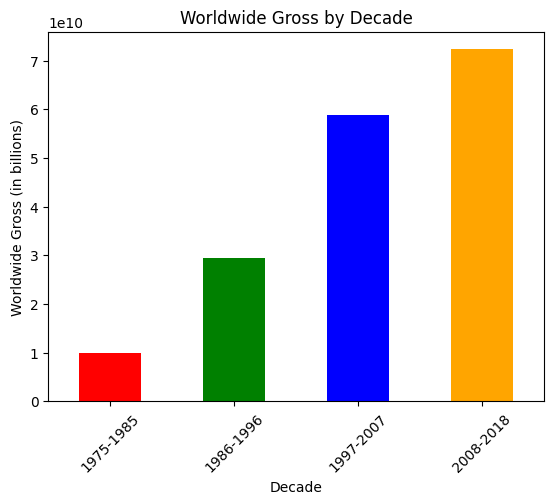

In [47]:
#make a bar chart to display the worldwide gross data to make sure the data is seen
ax=sums_df.plot(kind='bar', legend=None, x='Decade', y='Worldwide Gross', color=['red', 'green', 'blue', 'orange'])

# Set the chart title & axis labels
ax.set_title('Worldwide Gross by Decade')
ax.set_ylabel('Worldwide Gross (in billions)')
ax.set_xlabel('Decade')


# Set the xticks and xticklabels properties of the axis to label each bar
ax.set_xticklabels(['1975-1985', '1986-1996', '1997-2007', '2008-2018'], rotation=45)

# Show the chart
plt.show()

In [48]:
#sort the movies into bins based on the release year and add a column with that new label
# Define the bin edges and labels
bins = [1975, 1986, 1997, 2008, 2019]
labels = ['1975-1985', '1986-1996', '1997-2007', '2008-2018']

# Create a new column in the DataFrame containing the bin labels
clean_df['Year_Bin'] = pd.cut(clean_df['Year'], bins=bins, labels=labels, include_lowest=True)

In [49]:
# Print the genre count for the whole df
clean_df['Main Genre'].value_counts()

Thriller     63
Comedy       55
Fantasy      54
Sci-Fi       50
Romance      48
Action       30
Drama        30
Animation    22
Crime        17
Family       16
Adventure    13
War          10
Music         9
Horror        8
Sport         7
History       5
Name: Main Genre, dtype: int64

In [50]:
# Filter the DataFrame by the desired bin
bin_data = clean_df[clean_df['Year_Bin'] == '2008-2018']

#count up the number of movies in each genre for this decade
bin_data=bin_data['Main Genre'].value_counts()
bin_data_df=pd.DataFrame(bin_data)
# Reset index and rename column
bin_data_df = bin_data_df.reset_index().rename(columns={'index': 'Main Genre', 'Main Genre': 'Count'})

bin_data_df

,Main Genre,Count
0,Action,27
1,Sci-Fi,17
2,Fantasy,17
3,Animation,14
4,Comedy,11
5,Thriller,8
6,Music,2
7,Horror,1
8,Romance,1
9,Adventure,1


<function matplotlib.pyplot.show(close=None, block=None)>

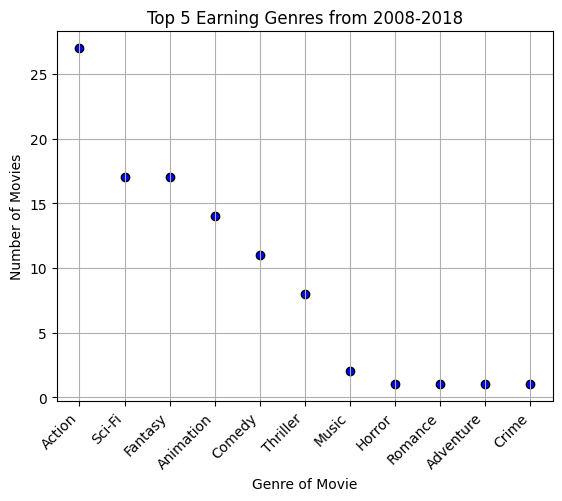

In [51]:
#make a scatter plot to show the number of movies in this decade 2008-2018

x_values = bin_data_df['Main Genre']
y_values = bin_data_df['Count']
plt.grid()
plt.xlabel('Genre of Movie')
plt.ylabel('Number of Movies')
plt.title('Top 5 Earning Genres from 2008-2018')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=1.0)
# Adjust x-axis label spacing
plt.xticks(rotation=45, ha='right')

plt.show

In [52]:
#use groupby() to find the genre count for movies in each decade
one_group = clean_df.groupby(['Year_Bin', 'Main Genre'])
one_count = one_group.count()

#find the top 5 genres of movies 1975-2018
count_df=pd.DataFrame(one_count)
count_df.sort_values(by='Year_Bin', ascending=False).iloc[:5,:]

top_5 = count_df.apply(lambda x: x.nlargest(5)).reset_index()
print(top_5)

    Year_Bin Main Genre  IMDB Rating  Length  Rank In Year  Rating  \
0  1986-1996   Thriller           27      27            27      27   
1  2008-2018     Action           27      27            27      27   
2  1997-2007    Fantasy           23      23            23      23   
3  1975-1985    Romance           20      20            20      20   
4  1975-1985     Comedy           17      17            17      17   

   Production Studio  Movie Title  Worldwide Gross  Year  
0                 27           27               27    27  
1                 27           27               27    27  
2                 23           23               23    23  
3                 20           20               20    20  
4                 17           17               17    17  
